## Data preprocessing and imports

In [1]:
#!pip install console_progressbar

  Created wheel for console-progressbar: filename=console_progressbar-1.1.2-py3-none-any.whl size=4146 sha256=2ef2429360975d32a21c395d0fdf33ff0cd467fc8b142214e3e4560e13abb8e5
  Stored in directory: c:\users\morningstar\appdata\local\pip\cache\wheels\a6\ed\f4\fbee97c7d412f5b7807f8592c8aa20c9d3722a32f1c75ac6ed
Successfully built console-progressbar


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import tarfile
import scipy.io
import numpy as np
import pandas as pd
import os
import cv2 as cv
import shutil
import random
from pathlib import Path
from console_progressbar import ProgressBar

In [3]:
pwd

'C:\\Users\\Morningstar\\Documents\\CARSv2'

In [3]:
def ensure_folder(folder):
    if not os.path.exists(folder):
        os.makedirs(folder)
        
def save_train_data(fnames, labels, bboxes):
    src_folder ='C:\\Users\\Morningstar\\Documents\\CARSv2\\train'
    num_samples = len(fnames)

    train_split = 0.8
    num_train = int(round(num_samples * train_split))
    train_indexes = random.sample(range(num_samples), num_train)

    pb = ProgressBar(total=100, prefix='Save train data', suffix='', decimals=3, length=50, fill='=')

    for i in range(num_samples):
        fname = fnames[i]
        label = labels[i]
        (x1, y1, x2, y2) = bboxes[i]

        src_path = os.path.join(src_folder, fname)
        src_image = cv.imread(src_path)
        height, width = src_image.shape[:2]
        # margins of 16 pixels
        margin = 16
        x1 = max(0, x1 - margin)
        y1 = max(0, y1 - margin)
        x2 = min(x2 + margin, width)
        y2 = min(y2 + margin, height)
        # print("{} -> {}".format(fname, label))
        pb.print_progress_bar((i + 1) * 100 / num_samples)

        if i in train_indexes:
            dst_folder = 'C:\\Users\\Morningstar\\Documents\\CARSv2\\data\\train'
        else:
            dst_folder = 'C:\\Users\\Morningstar\\Documents\\CARSv2\\data\\valid'

        dst_path = os.path.join(dst_folder, label)
        if not os.path.exists(dst_path):
            os.makedirs(dst_path)
        dst_path = os.path.join(dst_path, fname)

        crop_image = src_image[y1:y2, x1:x2]
        dst_img = cv.resize(src=crop_image, dsize=(img_height, img_width))
        cv.imwrite(dst_path, dst_img)

In [4]:
def save_test_data(fnames, bboxes):
    src_folder = 'C:\\Users\\Morningstar\\Documents\\CARSv2\\test'
    dst_folder = 'C:\\Users\\Morningstar\\Documents\\CARSv2\\data\\test'
    num_samples = len(fnames)

    pb = ProgressBar(total=100, prefix='Save test data', suffix='', decimals=3, length=50, fill='=')

    for i in range(num_samples):
        fname = fnames[i]
        (x1, y1, x2, y2) = bboxes[i]
        src_path = os.path.join(src_folder, fname)
        src_image = cv.imread(src_path)
        height, width = src_image.shape[:2]
        # margins of 16 pixels
        margin = 16
        x1 = max(0, x1 - margin)
        y1 = max(0, y1 - margin)
        x2 = min(x2 + margin, width)
        y2 = min(y2 + margin, height)
        # print(fname)
        pb.print_progress_bar((i + 1) * 100 / num_samples)

        dst_path = os.path.join(dst_folder, fname)
        crop_image = src_image[y1:y2, x1:x2]
        dst_img = cv.resize(src=crop_image, dsize=(img_height, img_width))
        cv.imwrite(dst_path, dst_img)

In [5]:
def process_train_data():
    print("Processing train data...")
    cars_annos = scipy.io.loadmat('C:\\Users\\Morningstar\\Documents\\CARSv2\\cars_train_annos.mat')
    annotations = cars_annos['annotations']
    annotations = np.transpose(annotations)

    fnames = []
    class_ids = []
    bboxes = []
    labels = []

    for annotation in annotations:
        bbox_x1 = annotation[0][0][0][0]
        bbox_y1 = annotation[0][1][0][0]
        bbox_x2 = annotation[0][2][0][0]
        bbox_y2 = annotation[0][3][0][0]
        class_id = annotation[0][4][0][0]
        labels.append('%04d' % (class_id,))
        fname = annotation[0][5][0]
        bboxes.append((bbox_x1, bbox_y1, bbox_x2, bbox_y2))
        class_ids.append(class_id)
        fnames.append(fname)

    labels_count = np.unique(class_ids).shape[0]
    print(np.unique(class_ids))
    print('The number of different cars is %d' % labels_count)

    save_train_data(fnames, labels, bboxes)

In [6]:
def process_test_data():
    print("Processing test data...")
    cars_annos = scipy.io.loadmat('C:\\Users\\Morningstar\\Documents\\CARSv2\\cars_test_annos.mat')
    annotations = cars_annos['annotations']
    annotations = np.transpose(annotations)

    fnames = []
    bboxes = []

    for annotation in annotations:
        bbox_x1 = annotation[0][0][0][0]
        bbox_y1 = annotation[0][1][0][0]
        bbox_x2 = annotation[0][2][0][0]
        bbox_y2 = annotation[0][3][0][0]
        fname = annotation[0][4][0]
        bboxes.append((bbox_x1, bbox_y1, bbox_x2, bbox_y2))
        fnames.append(fname)

    save_test_data(fnames, bboxes)

In [7]:
img_width, img_height = 224, 224

cars_meta = scipy.io.loadmat('C:\\Users\\Morningstar\\Documents\\CARSv2\\cars_meta.mat')
class_names = cars_meta['class_names']  # shape=(1, 196)
class_names = np.transpose(class_names)
print('class_names.shape: ' + str(class_names.shape))
print('Sample class_name: [{}]'.format(class_names[8][0][0]))

#ensure_folder('C:\\Users\\Morningstar\\Documents\\CARSv2\\data\\train')
#ensure_folder('C:\\Users\\Morningstar\\Documents\\CARSv2\\data\\valid')
#ensure_folder('C:\\Users\\Morningstar\\Documents\\CARSv2\\data\\test')

#process_train_data()
#process_test_data()

class_names.shape: (196, 1)
Sample class_name: [Aston Martin V8 Vantage Coupe 2012]


In [8]:
path= Path('C:\\Users\\Morningstar\\Documents\\CARSv2\\data');path

WindowsPath('C:/Users/Morningstar/Documents/CARSv2/data')

In [9]:
from fastai.vision.all import *
from fastai.metrics import error_rate
from fastai import *
import cv2 as cv
import numpy as np
import pandas as pd
import scipy.io as sio
from PIL import Image
import timm
from wwf.vision.timm import *
import torch
import torchvision
import random
from torch.distributions.beta import Beta

In [10]:
device = torch.device("cuda:{}".format(0) if torch.cuda.is_available() else "cpu")

In [11]:
def random_seed(seed_value, use_cuda):
    np.random.seed(seed_value) # cpu vars
    torch.manual_seed(seed_value) # cpu  vars
    random.seed(seed_value) # Python
    if use_cuda: 
        torch.cuda.manual_seed(seed_value)
        torch.cuda.manual_seed_all(seed_value) # gpu vars
        torch.backends.cudnn.deterministic = True  #needed
        torch.backends.cudnn.benchmark = False

In [12]:
random_seed(42,True)
augs = [*aug_transforms(size=192),Normalize.from_stats(*imagenet_stats),ToTensor()]

dblock = DataBlock(blocks=(ImageBlock,CategoryBlock),
                   get_items=get_image_files,
                   get_y=parent_label,
                   splitter=GrandparentSplitter(),
                   item_tfms=[Resize(size=224,method="squish"),ToTensor()],
                   batch_tfms=augs
                    )

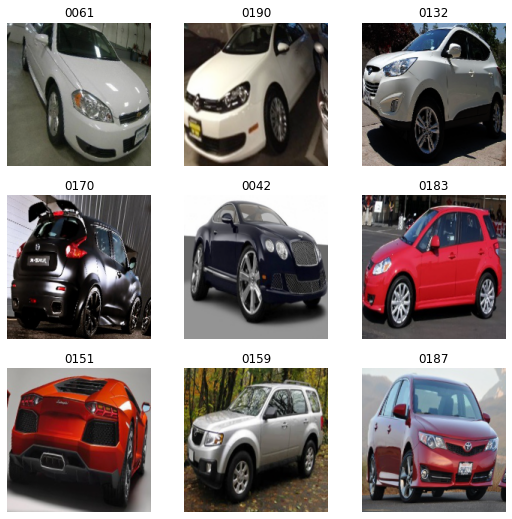

In [13]:
random_seed(42,True)
dls = dblock.dataloaders(path, bs=64, num_workers=0)
dls.show_batch()

In [23]:
dblock.summary(path)

Setting-up type transforms pipelines
Found 16233 items
2 datasets of sizes 6539,1653
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      C:\Users\Morningstar\Documents\CARSv2\data\train\0001\00163.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=224x224
  Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      C:\Users\Morningstar\Documents\CARSv2\data\train\0001\00163.jpg
    applying parent_label gives
      0001
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(0, dtype=torch.int32)

Final sample: (PILImage mode=RGB size=224x224, TensorCategory(0, dtype=torch.int32))


Setting up after_item: Pipeline: Resize -- {'size': (224, 224), 'method': 'squish', 'pad_mode': 'reflection', 'resamples': (2, 0), 'p': 1.0} ->

In [14]:
metrics =[accuracy]
mixup = MixUp()
learn = cnn_learner(dls,resnet50, loss_func=LabelSmoothingCrossEntropy(), metrics=metrics, cbs=mixup).to_fp16()

SuggestedLRs(lr_min=0.004786301031708717, lr_steep=1.5848931980144698e-06)

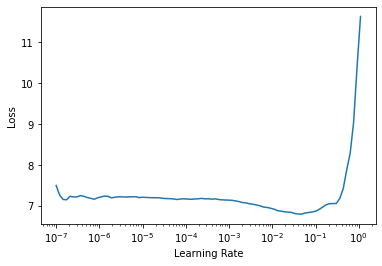

In [12]:
learn.lr_find()

In [14]:
random_seed(42,True)
learn.fine_tune(16, freeze_epochs=4, max_lr=3e-3)

In [15]:
learn.save('stage1-resnet50_mixup-224px')

Path('models/stage1-resnet50_mixup-224px.pth')

In [15]:
learn.load('stage1-resnet50_mixup-224px')

## Size change to 256 

In [16]:
random_seed(42,True)
augs = [*aug_transforms(size=224),Normalize.from_stats(*imagenet_stats),ToTensor()]

dblock = DataBlock(blocks=(ImageBlock,CategoryBlock),
                   get_items=get_image_files,
                   get_y=parent_label,
                   splitter=GrandparentSplitter(),
                   item_tfms=[Resize(size=256,method="squish"),ToTensor()],
                   batch_tfms=augs
                    )

In [10]:
random_seed(42,True)
dls = dblock.dataloaders(path, bs=48, num_workers=0)

In [17]:
random_seed(42,True)
learn.freeze()
learn.dls=dls

SuggestedLRs(lr_min=7.585775847473997e-08, lr_steep=1.5848931980144698e-06)

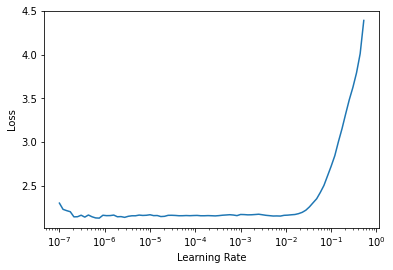

In [22]:
random_seed(42,True)
learn.lr_find()

In [23]:
random_seed(42,True)
learn.fine_tune(16, freeze_epochs=4, max_lr=1e-3)

In [24]:
learn.save('stage1-resnet50_mixup-256px')

Path('models/stage1-resnet50_mixup-256px.pth')

In [18]:
learn.load('stage1-resnet50_mixup-256px')

### Size change to 299 

In [19]:
random_seed(42,True)
augs = [*aug_transforms(size=256),Normalize.from_stats(*imagenet_stats),ToTensor()]

dblock = DataBlock(blocks=(ImageBlock,CategoryBlock),
                   get_items=get_image_files,
                   get_y=parent_label,
                   splitter=GrandparentSplitter(),
                   item_tfms=[Resize(size=299,method="squish"),ToTensor()],
                   batch_tfms=augs
                    )

In [20]:
random_seed(42,True)
dls = dblock.dataloaders(path, bs=32, num_workers=0)

In [21]:
random_seed(42,True)
learn.freeze()
learn.dls=dls

SuggestedLRs(lr_min=3.0199516913853586e-06, lr_steep=6.918309736647643e-06)

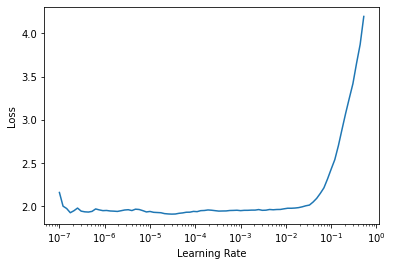

In [41]:
random_seed(42,True)
learn.lr_find()

In [42]:
random_seed(42,True)
learn.fine_tune(16, freeze_epochs=4, max_lr=1e-3)

In [43]:
learn.save('stage1-resnet50_mixup-299px')

Path('models/stage1-resnet50_mixup-299px.pth')

In [22]:
learn.load('stage1-resnet50_mixup-299px')

In [15]:
interp = Interpretation.from_learner(learn)

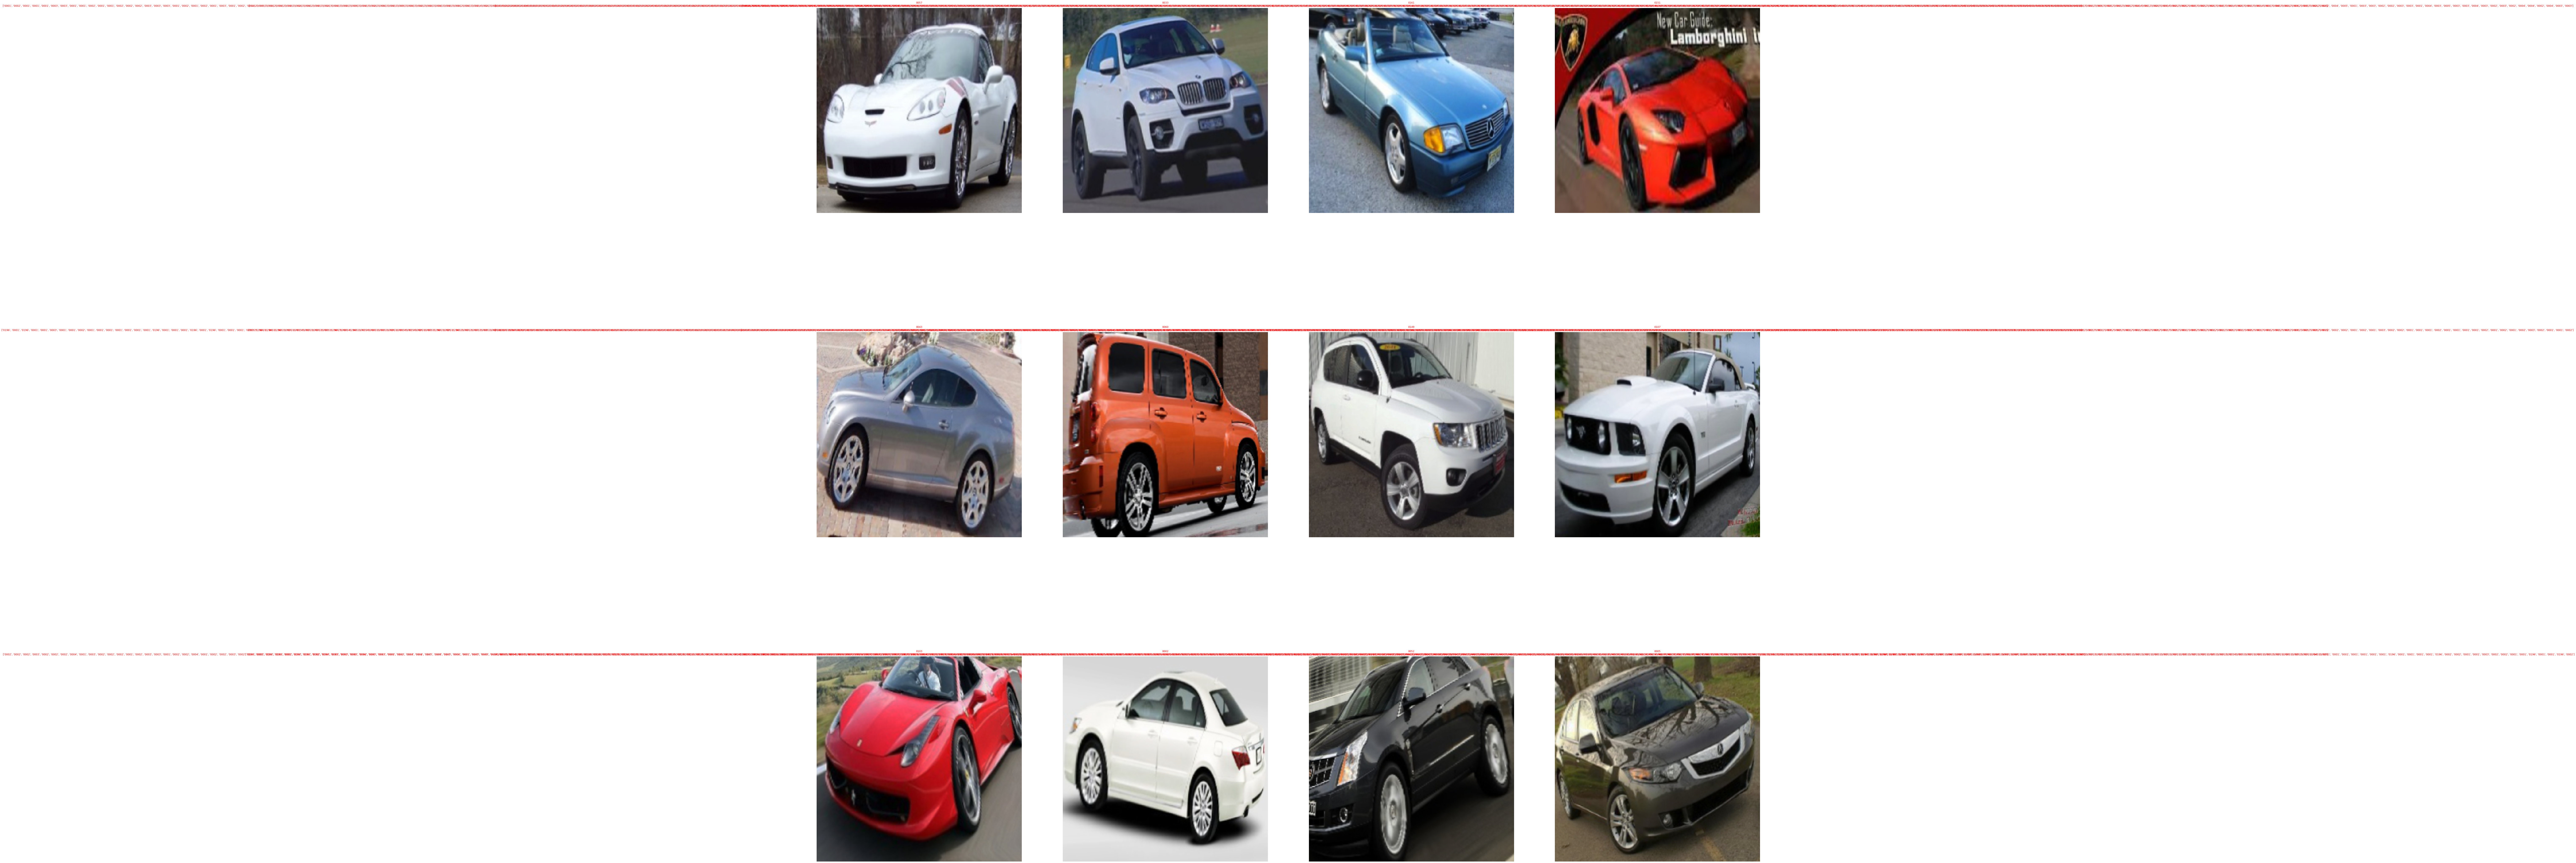

In [21]:
learn.show_results(ds_idx=0, max_n=12, figsize=(80,80))

In [17]:
interp.plot_top_losses(9,figsize=(80,80))

In [55]:
labels = sio.loadmat('cars_test_annos_withlabels.mat')

In [54]:
x = []
for i in range(8041):
    x.append(np.transpose(np.array(labels['annotations']['fname']))[i][0][0])

NameError: name 'labels' is not defined

In [27]:
df=pd.DataFrame(data=np.transpose(np.array(labels['annotations']['class'],dtype=np.int)),
                  index=x)

#df.to_csv('data/test_labels.csv')

In [45]:
test_dls=ImageDataLoaders.from_csv(path,'test_labels.csv', folder='test', num_workers=0,valid_pct=0, shuffle_train=False, item_tfms=Resize(size=224)
                  )

In [66]:
dls.items

[Path('C:/Users/Morningstar/Documents/CARSv2/data/train/0001/00163.jpg'),
 Path('C:/Users/Morningstar/Documents/CARSv2/data/train/0001/00462.jpg'),
 Path('C:/Users/Morningstar/Documents/CARSv2/data/train/0001/00522.jpg'),
 Path('C:/Users/Morningstar/Documents/CARSv2/data/train/0001/00707.jpg'),
 Path('C:/Users/Morningstar/Documents/CARSv2/data/train/0001/00887.jpg'),
 Path('C:/Users/Morningstar/Documents/CARSv2/data/train/0001/00946.jpg'),
 Path('C:/Users/Morningstar/Documents/CARSv2/data/train/0001/01661.jpg'),
 Path('C:/Users/Morningstar/Documents/CARSv2/data/train/0001/01832.jpg'),
 Path('C:/Users/Morningstar/Documents/CARSv2/data/train/0001/01918.jpg'),
 Path('C:/Users/Morningstar/Documents/CARSv2/data/train/0001/01952.jpg'),
 Path('C:/Users/Morningstar/Documents/CARSv2/data/train/0001/02050.jpg'),
 Path('C:/Users/Morningstar/Documents/CARSv2/data/train/0001/02145.jpg'),
 Path('C:/Users/Morningstar/Documents/CARSv2/data/train/0001/02311.jpg'),
 Path('C:/Users/Morningstar/Documents/

In [29]:
learn.metrics=[accuracy]

In [24]:
path

Path('C:/Users/Morningstar/Documents/CARSv2/data')

In [24]:
test_path = Path('C:/Users/Morningstar/Documents/CARSv2/data/test');test_path

Path('C:/Users/Morningstar/Documents/CARSv2/data/test')

In [25]:
fnames = get_image_files(test_path);fnames

(#8041) [Path('C:/Users/Morningstar/Documents/CARSv2/data/test/00001.jpg'),Path('C:/Users/Morningstar/Documents/CARSv2/data/test/00002.jpg'),Path('C:/Users/Morningstar/Documents/CARSv2/data/test/00003.jpg'),Path('C:/Users/Morningstar/Documents/CARSv2/data/test/00004.jpg'),Path('C:/Users/Morningstar/Documents/CARSv2/data/test/00005.jpg'),Path('C:/Users/Morningstar/Documents/CARSv2/data/test/00006.jpg'),Path('C:/Users/Morningstar/Documents/CARSv2/data/test/00007.jpg'),Path('C:/Users/Morningstar/Documents/CARSv2/data/test/00008.jpg'),Path('C:/Users/Morningstar/Documents/CARSv2/data/test/00009.jpg'),Path('C:/Users/Morningstar/Documents/CARSv2/data/test/00010.jpg')...]

In [48]:
test_dl=learn.dls.test_dl(fnames)

In [49]:
preds = learn.get_preds(dl=test_dl)

In [50]:
a=preds[0];a.shape

torch.Size([8041, 196])

In [57]:
b=np.array(labels['annotations']['class'],dtype=np.int)-1;b.shape 
b = torch.from_numpy(b)

### Stage 1 256px 90,5% acc 
### Stage 1 299px 91.85% acc

In [52]:
acc=accuracy(a,b);acc

tensor(0.9185)

In [29]:
from utils import get_path, get_x, get_y, show_img, draw_outline, draw_rect, draw_text, crop, compare_top_losses, compare_most_confused

In [30]:
base_path=get_path()

In [32]:
test_labels_df = pd.read_csv(base_path/'test_labels_with_annos.csv')

In [50]:
test_labels_df.head()

filename                           class_name  class_id  vocab_id
0  test_00001.jpg              Suzuki Aerio Sedan 2007       181       180
1  test_00002.jpg  Ferrari 458 Italia Convertible 2012       103       100
2  test_00003.jpg                Jeep Patriot SUV 2012       145       147
3  test_00004.jpg              Toyota Camry Sedan 2012       187       186
4  test_00005.jpg             Tesla Model S Sedan 2012       185       184

In [33]:
test_item = base_path/'merged'/test_labels_df['filename'][0]; test_item

Path('C:/Users/Morningstar/Documents/CARSv2/merged/test_00001.jpg')

In [34]:
pred_y,pred_idx,probs=learn.predict(test_item)

In [38]:
act_y_id = test_labels_df['vocab_id'][0]
act_y = test_labels_df['class_name'][0]

In [39]:
np.argmax(probs)

tensor(180)

In [41]:
np.argmax(pred_idx),act_y_id

(tensor(180), 180)

In [42]:
test_items = get_x(test_labels_df);test_items

0       C:\Users\Morningstar\Documents\CARSv2\merged\test_00001.jpg
1       C:\Users\Morningstar\Documents\CARSv2\merged\test_00002.jpg
2       C:\Users\Morningstar\Documents\CARSv2\merged\test_00003.jpg
3       C:\Users\Morningstar\Documents\CARSv2\merged\test_00004.jpg
4       C:\Users\Morningstar\Documents\CARSv2\merged\test_00005.jpg
                                   ...                             
8036    C:\Users\Morningstar\Documents\CARSv2\merged\test_08037.jpg
8037    C:\Users\Morningstar\Documents\CARSv2\merged\test_08038.jpg
8038    C:\Users\Morningstar\Documents\CARSv2\merged\test_08039.jpg
8039    C:\Users\Morningstar\Documents\CARSv2\merged\test_08040.jpg
8040    C:\Users\Morningstar\Documents\CARSv2\merged\test_08041.jpg
Name: filename, Length: 8041, dtype: object

In [43]:
test_dl = learn.dls.test_dl(test_items)

In [44]:
preds = learn.get_preds(dl=test_dl)

In [45]:
a = preds[0]; a.shape

torch.Size([8041, 196])

Kao što je očekivano tačnost na neizrezanim slikama je puno manja nego na izrezanim.

In [58]:
accuracy(a,b)

tensor(0.8361)

In [61]:
np.argmax(a[100])

tensor(188)

In [67]:
b[0][100]

tensor(188, dtype=torch.int32)